Dimensionality Reduction

Dataset: MNIST

Tasks: reduce the dataset’s dimensionality (PCA, t-SNE, LLE, MDS, LDA), then apply classification
(Logistic, SVM, Random Forest)

Hints: sklearn.decomposition, PCA(), IncrementalPCA(), KernelPCA()

Import data set

In [1]:
pip install pandas numpy matplotlib sklearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
housing_data = pd.read_csv('housing.csv')

# Remove all rows with NA values in the entire dataset
housing_data = housing_data.dropna()

print(housing_data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


Standardise the data

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

# Standardize the data
features = housing_data.drop('ocean_proximity', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Projection using LLE

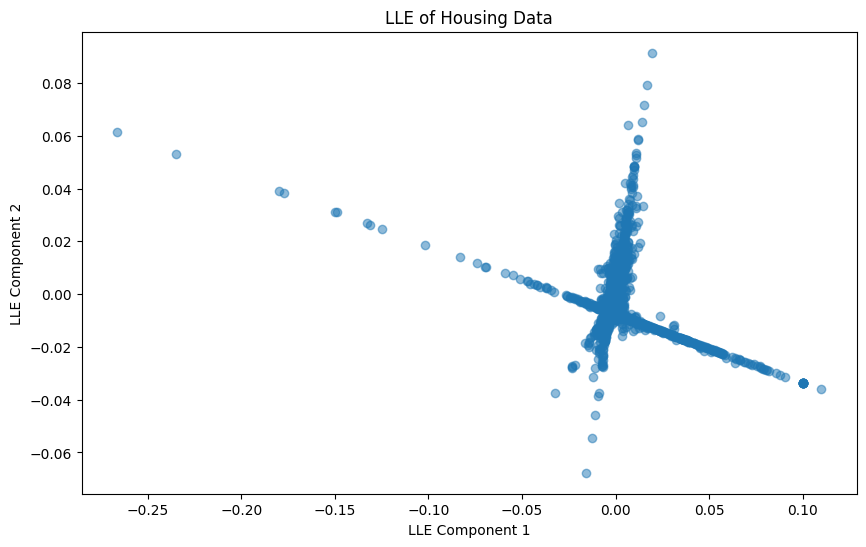

In [4]:
from sklearn.manifold import LocallyLinearEmbedding

# Apply LLE
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
lle_components = lle.fit_transform(scaled_features)

# Create a DataFrame with the LLE components
lle_df = pd.DataFrame(data=lle_components, columns=['LLE Component 1', 'LLE Component 2'])

# Plot the LLE components
plt.figure(figsize=(10, 6))
plt.scatter(lle_df['LLE Component 1'], lle_df['LLE Component 2'], alpha=0.5)
plt.xlabel('LLE Component 1')
plt.ylabel('LLE Component 2')
plt.title('LLE of Housing Data')
plt.show()

Logistic Classification

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define the target variable and features
X = lle_df
y = housing_data['median_house_value'] > housing_data['median_house_value'].median()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.5818448739907022
Classification Report:
              precision    recall  f1-score   support

       False       0.61      0.50      0.55      2065
        True       0.57      0.67      0.61      2022

    accuracy                           0.58      4087
   macro avg       0.59      0.58      0.58      4087
weighted avg       0.59      0.58      0.58      4087



Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Define the target variable and features
X = lle_df
y = housing_data['median_house_value'] > housing_data['median_house_value'].median()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f'Random Forest Accuracy: {accuracy_rf}')
print('Random Forest Classification Report:')
print(report_rf)

Random Forest Accuracy: 0.8115977489601175
Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.82      0.82      2065
        True       0.82      0.80      0.81      2022

    accuracy                           0.81      4087
   macro avg       0.81      0.81      0.81      4087
weighted avg       0.81      0.81      0.81      4087



SVM

In [7]:
from sklearn.svm import SVC

# Define the target variable and features
X = lle_df
y = housing_data['median_house_value'] > housing_data['median_house_value'].median()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM model
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_clf.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print(f'SVM Accuracy: {accuracy_svm}')
print('SVM Classification Report:')
print(report_svm)

SVM Accuracy: 0.6943968681184243
SVM Classification Report:
              precision    recall  f1-score   support

       False       0.74      0.61      0.67      2065
        True       0.66      0.78      0.72      2022

    accuracy                           0.69      4087
   macro avg       0.70      0.70      0.69      4087
weighted avg       0.70      0.69      0.69      4087

